## 8-qubit general implementation for GL Algorithm for Maxima

In [59]:
#Import necessary libraries
import qiskit
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute, Aer, IBMQ, transpile, execute
from qiskit.visualization import plot_state_hinton, plot_histogram, plot_bloch_vector, plot_state_qsphere
from qiskit.providers.ibmq import least_busy
#from qiskit.aqua.circuits.gates.multi_control_toffoli_gate import _cccx
import numpy as np
import matplotlib.pyplot as plt


%config InlineBackend.figure_format = 'svg' # Makes the images look nice
%matplotlib inline

#Configuration of Initial Parameters
n = 8         #number of qubits --- must be a power of 2.
N = 2**n
M = 25         #number of solutions to mark
solution_known = True
phi_estimated = 0.0     #enter the estimated value to start

In [60]:
#Calculate Phase-Shift angle and Number of Iterations
beta = np.arcsin(np.sqrt(M/N))
J = np.floor(((np.pi/2) - beta)/beta) + 1
phi_val = 2*np.arcsin(np.sin(np.pi/(4*J + 2))/np.sin(beta))
J = int(J)

print("Number of Qubits, n \t\t= ", n)
print("Number of Marked Solutions, M \t= ", M, "\n")
print("Phase-Shift Parameter, φ \t= ", phi_val)
print("Number of Iternations, J \t= ", J)
print("β value \t\t\t= ", beta)

if solution_known == False:
    phi_val = phi_estimated
else:
    pass


Number of Qubits, n 		=  8
Number of Marked Solutions, M 	=  25 

Phase-Shift Parameter, φ 	=  1.1783472598993934
Number of Iternations, J 	=  4
β value 			=  0.31782370392788073


In [61]:
#Quantum Circuit Definition
qc = QuantumCircuit(n)

#Circuit Generators
def decimalToBinary(n):  
    return bin(n).replace("0b", "")

def to_binary_value(k):
    if k.is_integer() == True:
        if k%2 == 0:
            gen_mark_circuit(int(decimalToBinary(k)))
        else:
            gen_mark_circuit(int(decimalToBinary(k-1)))
    else:
        print("Marked Value is not an Integer.")
        
d_0 = 0 #initialize d_0 with 0 the assumption of Maxima. Or choose a random value from D. We then iterate through the database D to mark M maxima states.
d_1 = 0
iter_halt = 10 #interrupt condition 


In [62]:
def odd_states():
    
    #Odd marked state = 235
    #qc.x(1)
    qc.x(2)
    #qc.x(3)
    qc.x(4)
    #qc.x(5)
    #qc.x(6)
    #qc.x(7)
    qc.mcu1(phi_val, [1,2,3,4,5,6,7], 0) #multi-control phase
    #qc.x(1)
    qc.x(2)
    #qc.x(3)
    qc.x(4)
    #qc.x(5)
    #qc.x(6)
    #qc.x(7)
    
    #Odd marked state = 187
    #qc.x(1)
    qc.x(2)
    #qc.x(3)
    #qc.x(4)
    #qc.x(5)
    qc.x(6)
    #qc.x(7)
    qc.mcu1(phi_val, [1,2,3,4,5,6,7], 0) #multi-control phase
    #qc.x(1)
    qc.x(2)
    #qc.x(3)
    #qc.x(4)
    #qc.x(5)
    qc.x(6)
    #qc.x(7)
    
    #Odd marked state = 219
    #qc.x(1)
    qc.x(2)
    #qc.x(3)
    #qc.x(4)
    qc.x(5)
    #qc.x(6)
    #qc.x(7)
    qc.mcu1(phi_val, [1,2,3,4,5,6,7], 0) #multi-control phase
    #qc.x(1)
    qc.x(2)
    #qc.x(3)
    #qc.x(4)
    qc.x(5)
    #qc.x(6)
    #qc.x(7)
    
    #Odd marked state = 91
    #qc.x(1)
    qc.x(2)
    #qc.x(3)
    #qc.x(4)
    qc.x(5)
    #qc.x(6)
    qc.x(7)
    qc.mcu1(phi_val, [1,2,3,4,5,6,7], 0) #multi-control phase
    #qc.x(1)
    qc.x(2)
    #qc.x(3)
    #qc.x(4)
    qc.x(5)
    #qc.x(6)
    qc.x(7)
    
    #Odd marked state = 147
    #qc.x(1)
    qc.x(2)
    qc.x(3)
    #qc.x(4)
    qc.x(5)
    qc.x(6)
    #qc.x(7)
    qc.mcu1(phi_val, [1,2,3,4,5,6,7], 0) #multi-control phase
    #qc.x(1)
    qc.x(2)
    qc.x(3)
    #qc.x(4)
    qc.x(5)
    qc.x(6)
    #qc.x(7)
    
    #Odd marked state = 135
    #qc.x(1)
    #qc.x(2)
    qc.x(3)
    qc.x(4)
    qc.x(5)
    qc.x(6)
    #qc.x(7)
    qc.mcu1(phi_val, [1,2,3,4,5,6,7], 0) #multi-control phase
    #qc.x(1)
    #qc.x(2)
    qc.x(3)
    qc.x(4)
    qc.x(5)
    qc.x(6)
    #qc.x(7)
    
    #Odd marked state = 103
    #qc.x(1)
    #qc.x(2)
    qc.x(3)
    qc.x(4)
    #qc.x(5)
    #qc.x(6)
    qc.x(7)
    qc.mcu1(phi_val, [1,2,3,4,5,6,7], 0) #multi-control phase
    #qc.x(1)
    #qc.x(2)
    qc.x(3)
    qc.x(4)
    #qc.x(5)
    #qc.x(6)
    qc.x(7)
    
    #Odd marked state = 101
    qc.x(1)
    #qc.x(2)
    qc.x(3)
    qc.x(4)
    #qc.x(5)
    #qc.x(6)
    qc.x(7)
    qc.mcu1(phi_val, [1,2,3,4,5,6,7], 0) #multi-control phase
    qc.x(1)
    #qc.x(2)
    qc.x(3)
    qc.x(4)
    #qc.x(5)
    #qc.x(6)
    qc.x(7)
    
    #Odd marked state = 89
    qc.x(1)
    qc.x(2)
    #qc.x(3)
    #qc.x(4)
    qc.x(5)
    #qc.x(6)
    qc.x(7)
    qc.mcu1(phi_val, [1,2,3,4,5,6,7], 0) #multi-control phase
    qc.x(1)
    qc.x(2)
    #qc.x(3)
    #qc.x(4)
    qc.x(5)
    #qc.x(6)
    qc.x(7)
    
    #Odd marked state = 87
    #qc.x(1)
    #qc.x(2)
    qc.x(3)
    #qc.x(4)
    qc.x(5)
    #qc.x(6)
    qc.x(7)
    qc.mcu1(phi_val, [1,2,3,4,5,6,7], 0) #multi-control phase
    #qc.x(1)
    #qc.x(2)
    qc.x(3)
    #qc.x(4)
    qc.x(5)
    #qc.x(6)
    qc.x(7)
    
    #Odd marked state = 83
    #qc.x(1)
    qc.x(2)
    qc.x(3)
    #qc.x(4)
    qc.x(5)
    #qc.x(6)
    qc.x(7)
    qc.mcu1(phi_val, [1,2,3,4,5,6,7], 0) #multi-control phase
    #qc.x(1)
    qc.x(2)
    qc.x(3)
    #qc.x(4)
    qc.x(5)
    #qc.x(6)
    qc.x(7)
    
    #Odd marked state = 97
    qc.x(1)
    qc.x(2)
    qc.x(3)
    qc.x(4)
    #qc.x(5)
    #qc.x(6)
    qc.x(7)
    qc.mcu1(phi_val, [1,2,3,4,5,6,7], 0) #multi-control phase
    qc.x(1)
    qc.x(2)
    qc.x(3)
    qc.x(4)
    #qc.x(5)
    #qc.x(6)
    qc.x(7)
    
    #Odd marked state = 93
    qc.x(1)
    #qc.x(2)
    #qc.x(3)
    #qc.x(4)
    qc.x(5)
    #qc.x(6)
    qc.x(7)
    qc.mcu1(phi_val, [1,2,3,4,5,6,7], 0) #multi-control phase
    qc.x(1)
    #qc.x(2)
    #qc.x(3)
    #qc.x(4)
    qc.x(5)
    #qc.x(6)
    qc.x(7)
    
    #Odd marked state = 81
    qc.x(1)
    qc.x(2)
    qc.x(3)
    #qc.x(4)
    qc.x(5)
    #qc.x(6)
    qc.x(7)
    qc.mcu1(phi_val, [1,2,3,4,5,6,7], 0) #multi-control phase
    qc.x(1)
    qc.x(2)
    qc.x(3)
    #qc.x(4)
    qc.x(5)
    #qc.x(6)
    qc.x(7)

def even_states():
    
    #Even marked state = 86
    #qc.x(1)
    #qc.x(2)
    qc.x(3)
    #qc.x(4)
    qc.x(5)
    #qc.x(6)
    qc.x(7)
    qc.mcx([1,2,3,4,5,6,7],0)
    #qc.x(1)
    #qc.x(2)
    qc.x(3)
    #qc.x(4)
    qc.x(5)
    #qc.x(6)
    qc.x(7)
    #-----
    #qc.x(1)
    #qc.x(2)
    qc.x(3)
    #qc.x(4)
    qc.x(5)
    #qc.x(6)
    qc.x(7)
    qc.mcu1(phi_val, [1,2,3,4,5,6,7], 0) #multi-control phase
    #qc.x(1)
    #qc.x(2)
    qc.x(3)
    #qc.x(4)
    qc.x(5)
    #qc.x(6)
    qc.x(7)
    #-----
    #qc.x(1)
    #qc.x(2)
    qc.x(3)
    #qc.x(4)
    qc.x(5)
    #qc.x(6)
    qc.x(7)
    qc.mcx([1,2,3,4,5,6,7],0)
    #qc.x(1)
    #qc.x(2)
    qc.x(3)
    #qc.x(4)
    qc.x(5)
    #qc.x(6)
    qc.x(7)
    
    #Even marked state = 100
    qc.x(1)
    #qc.x(2)
    qc.x(3)
    qc.x(4)
    #qc.x(5)
    #qc.x(6)
    qc.x(7)
    qc.mcx([1,2,3,4,5,6,7],0)
    qc.x(1)
    #qc.x(2)
    qc.x(3)
    qc.x(4)
    #qc.x(5)
    #qc.x(6)
    qc.x(7)
    #-----
    qc.x(1)
    #qc.x(2)
    qc.x(3)
    qc.x(4)
    #qc.x(5)
    #qc.x(6)
    qc.x(7)
    qc.mcu1(phi_val, [1,2,3,4,5,6,7], 0) #multi-control phase
    qc.x(1)
    #qc.x(2)
    qc.x(3)
    qc.x(4)
    #qc.x(5)
    #qc.x(6)
    qc.x(7)
    #-----
    qc.x(1)
    #qc.x(2)
    qc.x(3)
    qc.x(4)
    #qc.x(5)
    #qc.x(6)
    qc.x(7)
    qc.mcx([1,2,3,4,5,6,7],0)
    qc.x(1)
    #qc.x(2)
    qc.x(3)
    qc.x(4)
    #qc.x(5)
    #qc.x(6)
    qc.x(7)
    
    #Even marked state = 102
    #qc.x(1)
    #qc.x(2)
    qc.x(3)
    qc.x(4)
    #qc.x(5)
    #qc.x(6)
    qc.x(7)
    qc.mcx([1,2,3,4,5,6,7],0)
    #qc.x(1)
    #qc.x(2)
    qc.x(3)
    qc.x(4)
    #qc.x(5)
    #qc.x(6)
    qc.x(7)
    #-----
    #qc.x(1)
    #qc.x(2)
    qc.x(3)
    qc.x(4)
    #qc.x(5)
    #qc.x(6)
    qc.x(7)
    qc.mcu1(phi_val, [1,2,3,4,5,6,7], 0) #multi-control phase
    #qc.x(1)
    #qc.x(2)
    qc.x(3)
    qc.x(4)
    #qc.x(5)
    #qc.x(6)
    qc.x(7)
    #-----
    #qc.x(1)
    #qc.x(2)
    qc.x(3)
    qc.x(4)
    #qc.x(5)
    #qc.x(6)
    qc.x(7)
    qc.mcx([1,2,3,4,5,6,7],0)
    #qc.x(1)
    #qc.x(2)
    qc.x(3)
    qc.x(4)
    #qc.x(5)
    #qc.x(6)
    qc.x(7)
    
    #Even marked state = 136
    qc.x(1)
    qc.x(2)
    #qc.x(3)
    qc.x(4)
    qc.x(5)
    qc.x(6)
    #qc.x(7)
    qc.mcx([1,2,3,4,5,6,7],0)
    qc.x(1)
    qc.x(2)
    #qc.x(3)
    qc.x(4)
    qc.x(5)
    qc.x(6)
    #qc.x(7)
    #-----
    qc.x(1)
    qc.x(2)
    #qc.x(3)
    qc.x(4)
    qc.x(5)
    qc.x(6)
    #qc.x(7)
    qc.mcu1(phi_val, [1,2,3,4,5,6,7], 0) #multi-control phase
    qc.x(1)
    qc.x(2)
    #qc.x(3)
    qc.x(4)
    qc.x(5)
    qc.x(6)
    #qc.x(7)
    #-----
    qc.x(1)
    qc.x(2)
    #qc.x(3)
    qc.x(4)
    qc.x(5)
    qc.x(6)
    #qc.x(7)
    qc.mcx([1,2,3,4,5,6,7],0)
    qc.x(1)
    qc.x(2)
    #qc.x(3)
    qc.x(4)
    qc.x(5)
    qc.x(6)
    #qc.x(7)
    
    #Even marked state = 126
    #qc.x(1)
    #qc.x(2)
    #qc.x(3)
    #qc.x(4)
    #qc.x(5)
    #qc.x(6)
    qc.x(7)
    qc.mcx([1,2,3,4,5,6,7],0)
    #qc.x(1)
    #qc.x(2)
    #qc.x(3)
    #qc.x(4)
    #qc.x(5)
    #qc.x(6)
    qc.x(7)
    #-----
    #qc.x(1)
    #qc.x(2)
    #qc.x(3)
    #qc.x(4)
    #qc.x(5)
    #qc.x(6)
    qc.x(7)
    qc.mcu1(phi_val, [1,2,3,4,5,6,7], 0) #multi-control phase
    #qc.x(1)
    #qc.x(2)
    #qc.x(3)
    #qc.x(4)
    #qc.x(5)
    #qc.x(6)
    qc.x(7)
    #-----
    #qc.x(1)
    #qc.x(2)
    #qc.x(3)
    #qc.x(4)
    #qc.x(5)
    #qc.x(6)
    qc.x(7)
    qc.mcx([1,2,3,4,5,6,7],0)
    #qc.x(1)
    #qc.x(2)
    #qc.x(3)
    #qc.x(4)
    #qc.x(5)
    #qc.x(6)
    qc.x(7)
    
    #Even marked state = 80
    qc.x(1)
    qc.x(2)
    qc.x(3)
    #qc.x(4)
    qc.x(5)
    #qc.x(6)
    qc.x(7)
    qc.mcx([1,2,3,4,5,6,7],0)
    qc.x(1)
    qc.x(2)
    qc.x(3)
    #qc.x(4)
    qc.x(5)
    #qc.x(6)
    qc.x(7)
    #-----
    qc.x(1)
    qc.x(2)
    qc.x(3)
    #qc.x(4)
    qc.x(5)
    #qc.x(6)
    qc.x(7)
    qc.mcu1(phi_val, [1,2,3,4,5,6,7], 0) #multi-control phase
    qc.x(1)
    qc.x(2)
    qc.x(3)
    #qc.x(4)
    qc.x(5)
    #qc.x(6)
    qc.x(7)
    #-----
    qc.x(1)
    qc.x(2)
    qc.x(3)
    #qc.x(4)
    qc.x(5)
    #qc.x(6)
    qc.x(7)
    qc.mcx([1,2,3,4,5,6,7],0)
    qc.x(1)
    qc.x(2)
    qc.x(3)
    #qc.x(4)
    qc.x(5)
    #qc.x(6)
    qc.x(7)
    
    #Even marked state = 104
    qc.x(1)
    qc.x(2)
    #qc.x(3)
    qc.x(4)
    #qc.x(5)
    #qc.x(6)
    qc.x(7)
    qc.mcx([1,2,3,4,5,6,7],0)
    qc.x(1)
    qc.x(2)
    #qc.x(3)
    qc.x(4)
    #qc.x(5)
    #qc.x(6)
    qc.x(7)
    #-----
    qc.x(1)
    qc.x(2)
    #qc.x(3)
    qc.x(4)
    #qc.x(5)
    #qc.x(6)
    qc.x(7)
    qc.mcu1(phi_val, [1,2,3,4,5,6,7], 0) #multi-control phase
    qc.x(1)
    qc.x(2)
    #qc.x(3)
    qc.x(4)
    #qc.x(5)
    #qc.x(6)
    qc.x(7)
    #-----
    qc.x(1)
    qc.x(2)
    #qc.x(3)
    qc.x(4)
    #qc.x(5)
    #qc.x(6)
    qc.x(7)
    qc.mcx([1,2,3,4,5,6,7],0)
    qc.x(1)
    qc.x(2)
    #qc.x(3)
    qc.x(4)
    #qc.x(5)
    #qc.x(6)
    qc.x(7)
    
    #Even marked state = 92
    qc.x(1)
    #qc.x(2)
    #qc.x(3)
    #qc.x(4)
    qc.x(5)
    #qc.x(6)
    qc.x(7)
    qc.mcx([1,2,3,4,5,6,7],0)
    qc.x(1)
    #qc.x(2)
    #qc.x(3)
    #qc.x(4)
    qc.x(5)
    #qc.x(6)
    qc.x(7)
    #-----
    qc.x(1)
    #qc.x(2)
    #qc.x(3)
    #qc.x(4)
    qc.x(5)
    #qc.x(6)
    qc.x(7)
    qc.mcu1(phi_val, [1,2,3,4,5,6,7], 0) #multi-control phase
    qc.x(1)
    #qc.x(2)
    #qc.x(3)
    #qc.x(4)
    qc.x(5)
    #qc.x(6)
    qc.x(7)
    #-----
    qc.x(1)
    #qc.x(2)
    #qc.x(3)
    #qc.x(4)
    qc.x(5)
    #qc.x(6)
    qc.x(7)
    qc.mcx([1,2,3,4,5,6,7],0)
    qc.x(1)
    #qc.x(2)
    #qc.x(3)
    #qc.x(4)
    qc.x(5)
    #qc.x(6)
    qc.x(7)
    
    #Even marked state = 90
    #qc.x(1)
    qc.x(2)
    #qc.x(3)
    #qc.x(4)
    qc.x(5)
    #qc.x(6)
    qc.x(7)
    qc.mcx([1,2,3,4,5,6,7],0)
    #qc.x(1)
    qc.x(2)
    #qc.x(3)
    #qc.x(4)
    qc.x(5)
    #qc.x(6)
    qc.x(7)
    #-----
    #qc.x(1)
    qc.x(2)
    #qc.x(3)
    #qc.x(4)
    qc.x(5)
    #qc.x(6)
    qc.x(7)
    qc.mcu1(phi_val, [1,2,3,4,5,6,7], 0) #multi-control phase
    #qc.x(1)
    qc.x(2)
    #qc.x(3)
    #qc.x(4)
    qc.x(5)
    #qc.x(6)
    qc.x(7)
    #-----
    #qc.x(1)
    qc.x(2)
    #qc.x(3)
    #qc.x(4)
    qc.x(5)
    #qc.x(6)
    qc.x(7)
    qc.mcx([1,2,3,4,5,6,7],0)
    #qc.x(1)
    qc.x(2)
    #qc.x(3)
    #qc.x(4)
    qc.x(5)
    #qc.x(6)
    qc.x(7)
    
    #Even marked state = 88
    qc.x(1)
    qc.x(2)
    #qc.x(3)
    #qc.x(4)
    qc.x(5)
    #qc.x(6)
    qc.x(7)
    qc.mcx([1,2,3,4,5,6,7],0)
    qc.x(1)
    qc.x(2)
    #qc.x(3)
    #qc.x(4)
    qc.x(5)
    #qc.x(6)
    qc.x(7)
    #-----
    qc.x(1)
    qc.x(2)
    #qc.x(3)
    #qc.x(4)
    qc.x(5)
    #qc.x(6)
    qc.x(7)
    qc.mcu1(phi_val, [1,2,3,4,5,6,7], 0) #multi-control phase
    qc.x(1)
    qc.x(2)
    #qc.x(3)
    #qc.x(4)
    qc.x(5)
    #qc.x(6)
    qc.x(7)
    #-----
    qc.x(1)
    qc.x(2)
    #qc.x(3)
    #qc.x(4)
    qc.x(5)
    #qc.x(6)
    qc.x(7)
    qc.mcx([1,2,3,4,5,6,7],0)
    qc.x(1)
    qc.x(2)
    #qc.x(3)
    #qc.x(4)
    qc.x(5)
    #qc.x(6)
    qc.x(7)
    
    #Even marked state = 82
    #qc.x(1)
    qc.x(2)
    qc.x(3)
    #qc.x(4)
    qc.x(5)
    #qc.x(6)
    qc.x(7)
    qc.mcx([1,2,3,4,5,6,7],0)
    #qc.x(1)
    qc.x(2)
    qc.x(3)
    #qc.x(4)
    qc.x(5)
    #qc.x(6)
    qc.x(7)
    #-----
    #qc.x(1)
    qc.x(2)
    qc.x(3)
    #qc.x(4)
    qc.x(5)
    #qc.x(6)
    qc.x(7)
    qc.mcu1(phi_val, [1,2,3,4,5,6,7], 0) #multi-control phase
    #qc.x(1)
    qc.x(2)
    qc.x(3)
    #qc.x(4)
    qc.x(5)
    #qc.x(6)
    qc.x(7)
    #-----
    #qc.x(1)
    qc.x(2)
    qc.x(3)
    #qc.x(4)
    qc.x(5)
    #qc.x(6)
    qc.x(7)
    qc.mcx([1,2,3,4,5,6,7],0)
    #qc.x(1)
    qc.x(2)
    qc.x(3)
    #qc.x(4)
    qc.x(5)
    #qc.x(6)
    qc.x(7)

In [63]:
#Complete Quantum Circuit

#Created equal superposition
for i in range(n):
    qc.h(i)
    
for k in range(J):

    #O_operator():
    even_states()
    odd_states()

    
    #Odd marked state = 90
    #qc.x(1)
    qc.x(2)
    #qc.x(3)
    #qc.x(4)
    qc.x(5)
    #qc.x(6)
    qc.x(7)
    qc.mcu1(phi_val, [1,2,3,4,5,6,7], 0) #multi-control phase
    #qc.x(1)
    qc.x(2)
    #qc.x(3)
    #qc.x(4)
    qc.x(5)
    #qc.x(6)
    qc.x(7)
    
    #odd-values
    #qc.append()
    
    #even-values
    #qc.append()

    #W_inverse_operator   #just use the default inverse() function to make W^-1 operartor
    for i in range(n):
        qc.h(i)
    qc.barrier()

    #def Io_operator():
    qc.x(1)
    qc.x(2)
    qc.x(3)
    qc.x(4)
    qc.x(5)
    qc.x(6)
    qc.x(7)
    qc.mcx([1,2,3,4,5,6,7],0)
    qc.x(1)
    qc.x(2)
    qc.x(3)
    qc.x(4)
    qc.x(5)
    qc.x(6)
    qc.x(7)
    #-----
    qc.x(1)
    qc.x(2)
    qc.x(3)
    qc.x(4)
    qc.x(5)
    qc.x(6)
    qc.x(7)
    qc.mcu1(phi_val, [1,2,3,4,5,6,7], 0) #multi-control phase
    qc.x(1)
    qc.x(2)
    qc.x(3)
    qc.x(4)
    qc.x(5)
    qc.x(6)
    qc.x(7)
    #-----
    qc.x(1)
    qc.x(2)
    qc.x(3)
    qc.x(4)
    qc.x(5)
    qc.x(6)
    qc.x(7)
    qc.mcx([1,2,3,4,5,6,7],0)
    qc.x(1)
    qc.x(2)
    qc.x(3)
    qc.x(4)
    qc.x(5)
    qc.x(6)
    qc.x(7)

    #W_operator()
    for i in range(n):
        qc.h(i)
    qc.barrier()

qc.measure_all()
qc.draw()

┌───┐     ┌───┐                             ┌───┐          ┌───┐     »
   q_0: ┤ H ├─────┤ X ├───────────■─────────────────┤ X ├──────────┤ X ├─────»
        ├───┤     └─┬─┘           │                 └─┬─┘┌───┐     └─┬─┘┌───┐»
   q_1: ┤ H ├───────■─────────────■───────────────────■──┤ X ├───────■──┤ X ├»
        ├───┤       │             │                   │  └───┘       │  └───┘»
   q_2: ┤ H ├───────■─────────────■───────────────────■──────────────■───────»
        ├───┤┌───┐  │  ┌───┐┌───┐ │       ┌───┐┌───┐  │  ┌───┐┌───┐  │  ┌───┐»
   q_3: ┤ H ├┤ X ├──■──┤ X ├┤ X ├─■───────┤ X ├┤ X ├──■──┤ X ├┤ X ├──■──┤ X ├»
        ├───┤└───┘  │  └───┘└───┘ │       └───┘└───┘  │  ├───┤└───┘  │  ├───┤»
   q_4: ┤ H ├───────■─────────────■───────────────────■──┤ X ├───────■──┤ X ├»
        ├───┤┌───┐  │  ┌───┐┌───┐ │       ┌───┐┌───┐  │  ├───┤       │  └───┘»
   q_5: ┤ H ├┤ X ├──■──┤ X ├┤ X ├─■───────┤ X ├┤ X ├──■──┤ X ├───────■───────»
        ├───┤└───┘  │  └───┘└───┘ │       └───┘└───┘  │  └───┘       │       »
   q_6: ┤ H ├───────■─────────────■───────────────────■──────────────■───────»
        ├───┤┌───┐  │  ┌───┐┌───┐ │1.1783 ┌───┐┌───┐  │  ┌───┐┌───┐  │  ┌───┐»
   q_7: ┤ H ├┤ X ├──■──┤ X ├┤ X ├─■───────┤ X ├┤ X ├──■──┤ X ├┤ X ├──■──┤ X ├»
        └───┘└───┘     └───┘└───┘         └───┘└───┘     └───┘└───┘     └───┘»
meas_0: ═════════════════════════════════════════════════════════════════════»
                                                                             »
meas_1: ═════════════════════════════════════════════════════════════════════»
                                                                             »
meas_2: ═════════════════════════════════════════════════════════════════════»
                                                                             »
meas_3: ═════════════════════════════════════════════════════════════════════»
                                                                             »
meas_4: ═════════════════════════════════════════════════════════════════════»
                                                                             »
meas_5: ═════════════════════════════════════════════════════════════════════»
                                                                             »
meas_6: ═════════════════════════════════════════════════════════════════════»
                                                                             »
meas_7: ═════════════════════════════════════════════════════════════════════»
                                                                             »
«                                ┌───┐          ┌───┐                        »
«   q_0: ──────■─────────────────┤ X ├──────────┤ X ├───────────■────────────»
«        ┌───┐ │       ┌───┐┌───┐└─┬─┘┌───┐     └─┬─┘           │            »
«   q_1: ┤ X ├─■───────┤ X ├┤ X ├──■──┤ X ├───────■─────────────■────────────»
«        └───┘ │       └───┘└───┘  │  └───┘       │             │            »
«   q_2: ──────■───────────────────■──────────────■─────────────■────────────»
«        ┌───┐ │       ┌───┐┌───┐  │  ┌───┐┌───┐  │  ┌───┐┌───┐ │       ┌───┐»
«   q_3: ┤ X ├─■───────┤ X ├┤ X ├──■──┤ X ├┤ X ├──■──┤ X ├┤ X ├─■───────┤ X ├»
«        ├───┤ │       ├───┤├───┤  │  ├───┤├───┤  │  ├───┤├───┤ │       ├───┤»
«   q_4: ┤ X ├─■───────┤ X ├┤ X ├──■──┤ X ├┤ X ├──■──┤ X ├┤ X ├─■───────┤ X ├»
«        └───┘ │       └───┘└───┘  │  └───┘└───┘  │  └───┘└───┘ │       └───┘»
«   q_5: ──────■───────────────────■──────────────■─────────────■────────────»
«              │                   │              │             │            »
«   q_6: ──────■───────────────────■──────────────■─────────────■────────────»
«        ┌───┐ │1.1783 ┌───┐┌───┐  │  ┌───┐┌───┐  │  ┌───┐┌───┐ │1.1783 ┌───┐»
«   q_7: ┤ X ├─■───────┤ X ├┤ X ├──■──┤ X ├┤ X ├──■──┤ X ├┤ X ├─■───────┤ X ├»
«        └───┘         └───┘└───┘     └───┘└───┘     └───┘└───┘         └───┘»
«meas_0: ═════════════════════════════════════════════════

In [64]:
# ---- State vector Simulation and Visualization ---- 
#backend = Aer.get_backend('statevector_simulator') #Choose Simulator
#result = execute(qc,backend).result() # Run simulation and get result
#out_state = result.get_statevector()
#plot_state_hinton(out_state) # Display the output state vector
#print(out_state)

{'10111011': 40, '01001010': 1, '11100101': 1, '10010011': 49, '00001001': 1, '01101000': 37, '01010010': 37, '01100100': 40, '01011010': 41, '01010110': 47, '10000111': 45, '01111110': 35, '01010000': 39, '01011101': 38, '01010011': 42, '01011100': 38, '11101011': 51, '01100001': 40, '10001000': 39, '01011000': 36, '01011011': 21, '01011001': 47, '11011011': 43, '01010001': 37, '01100110': 41, '01100101': 53, '01010111': 47, '11010000': 1, '01100111': 37}
CPU times: user 40.7 s, sys: 79.1 ms, total: 40.8 s
Wall time: 40.8 s


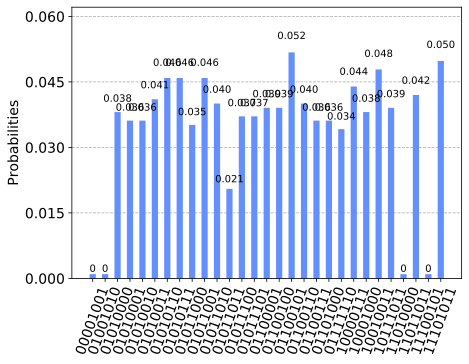

In [69]:
%%time

# ---- Execute on Local Simulator (upto 32 qubits) ----
backend = qiskit.BasicAer.get_backend('qasm_simulator')
result = execute(qc, backend).result()
counts = result.get_counts()
print(counts)
plot_histogram(counts)

In [70]:
#print(type(counts))
#print(counts)

#Plot histogram with decimal values
def binaryToDecimal(n):
    return int(n,2)

new_counts = {}

new_keys = []
for k in counts.keys():
    new_keys.append(str(binaryToDecimal(k)))

print(new_keys)

new_values = []
for vals in counts.values():
    new_values.append(vals)
    
print(new_values)

new_counts = dict(zip(new_keys,new_values))
print(new_counts)

#fig = plt.figure()
#ax = fig.add_axes([0,0,1,1])
#ax.bar(new_keys,new_values)
#for index, value in enumerate(new_values):
#    plt.text(value, index, str(value))
#plt.show()

#create a dictionary with new keys (i.e. decimal version) and their corresponding new_values.
#for i in range(len(new_keys)):
#        new_counts[i] = new_values[i]
#print(new_counts)


# Checking for Normalization.
# Normalized iff sum_counts == number of iterations in simulation (default = 1024).
sum_counts = 0
for a in counts.values():
    sum_counts = sum_counts + a;
if sum_counts == 1024:
    print("Normalized.")

['187', '74', '229', '147', '9', '104', '82', '100', '90', '86', '135', '126', '80', '93', '83', '92', '235', '97', '136', '88', '91', '89', '219', '81', '102', '101', '87', '208', '103']
[40, 1, 1, 49, 1, 37, 37, 40, 41, 47, 45, 35, 39, 38, 42, 38, 51, 40, 39, 36, 21, 47, 43, 37, 41, 53, 47, 1, 37]
{'187': 40, '74': 1, '229': 1, '147': 49, '9': 1, '104': 37, '82': 37, '100': 40, '90': 41, '86': 47, '135': 45, '126': 35, '80': 39, '93': 38, '83': 42, '92': 38, '235': 51, '97': 40, '136': 39, '88': 36, '91': 21, '89': 47, '219': 43, '81': 37, '102': 41, '101': 53, '87': 47, '208': 1, '103': 37}
Normalized.


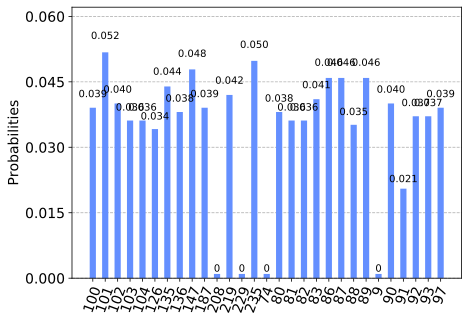

In [71]:
plot_histogram(new_counts)

In [68]:
# ---- Execute on real quantum device ----
# The following 3 lines do not need to be uncommented. Running them only saves the token locally.

#token = 'b29bc3ae17e2ed86d75a235eb5a0fb432192796adb39b37cf91614df48b432d1cdaac481103cdf8cc4b4587d4ffee85bc4d5a899a4311fd4a6981e70cdc6d629'
#qiskit.IBMQ.save_account(token)    
#provider = qiskit.IBMQ.load_account()

# Uncomment the following 3 lines to execute on the real IBMq device.
#backend = provider.get_backend('ibmq_16_melbourne')
#job = execute( qc, backend, shots=8192 )
#new_counts = result.get_counts()

#print(new_counts)
#plot_histogram(new_counts)